In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ksdensity as ks


In [2]:
def get_histogram_data(N, num_bins, method, **kwargs):
    if method.lower() == 'uniform':
        lower = kwargs.get('low', 0)
        upper = kwargs.get('high', 1)
        data = np.random.uniform(lower, upper, N)
        histogram_data = np.histogram(data, bins=num_bins,range= (lower, upper))
        print(histogram_data[1])
    elif method.lower() == 'normal':
        mean = kwargs.get('mean', 0)
        stddev = kwargs.get('stddev', 1)
        data = np.random.normal(mean, stddev, N)
        histogram_data = np.histogram(data, bins=num_bins)
    else:
        raise ValueError("Unsupported method. Use 'uniform' or 'normal'.")
    return data, histogram_data

def calculate(x_vals, method, **kwargs):
    if method.lower() == 'uniform':
        high = kwargs.get('high', 1)
        low = kwargs.get('low', 0)
        x_vals=np.append(x_vals, [low, high, low-0.001, high+0.001])
        x_vals = np.sort(x_vals)
        return x_vals, np.where((x_vals >= low) & (x_vals <= high), 1.0, 0.0) 
    elif method.lower() == 'normal':
        mean = kwargs.get('mean', 0)
        stddev = kwargs.get('stddev', 1)
        return x_vals, (1 / (stddev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_vals - mean) / stddev) ** 2)
    else:
        raise ValueError("Unsupported method. Use 'uniform' or 'normal'.")


def plot_data(N, num_bins, method, kernel_width=0.2,min_x=-0.5,max_x=1.5, data_override = False, data = None, histogram_data = None, **kwargs):
    if not data_override:
        data, histogram_data = get_histogram_data(N, num_bins, method, **kwargs)
    
    min_x = min_x
    max_x = max_x
    fig, ax = plt.subplots(3,figsize=(10, 15))
    ax[0].hist(data, bins=num_bins)
    ax[0].set_title(f'{method.capitalize()} Distribution Histogram')
    ks_data = ks.ksdensity(data=data, width = kernel_width)
    x_vals = np.linspace(min(data)-1, max(data)+1, int(N))
    ax[1].plot(x_vals, ks_data(x_vals), linestyle='solid', label="Kernel Density Estimate")
    
    x_vals_theoritical, theoritical_vals = calculate(x_vals, method, **kwargs)
    ax[1].plot(x_vals_theoritical, theoritical_vals, linestyle='dashed', label="Theoretical Density")
    ax[1].set_title('Kernel Density Estimate vs Theoretical Density')
    ax[1].legend()
    ax[1].set_xlim(left=min_x,right=max_x)
    

    bin_width = histogram_data[1][1] - histogram_data[1][0]
    ax[2].hist(data, bins=num_bins, density=False, label="Histogram plot", edgecolor='white')
    ax[2].grid(True)
    ax[2].plot(x_vals_theoritical, N*bin_width*theoritical_vals, linestyle='dashed', label="Scaled Theoretical Density")
    ax[2].set_title('Scaled Theoritical Density')
    ax[2].set_xlim(left=min_x,right=max_x)
    ax[2].legend()
    
    return data, histogram_data, fig, ax


[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]


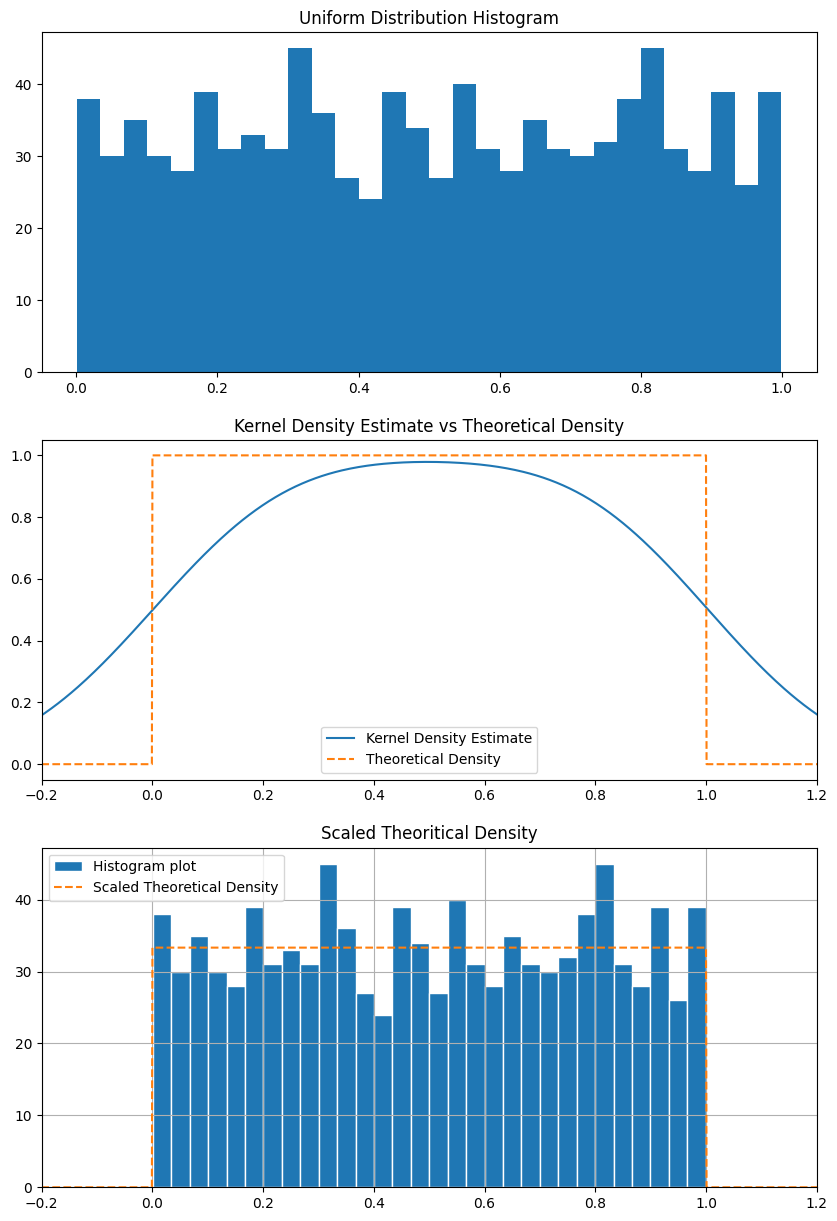

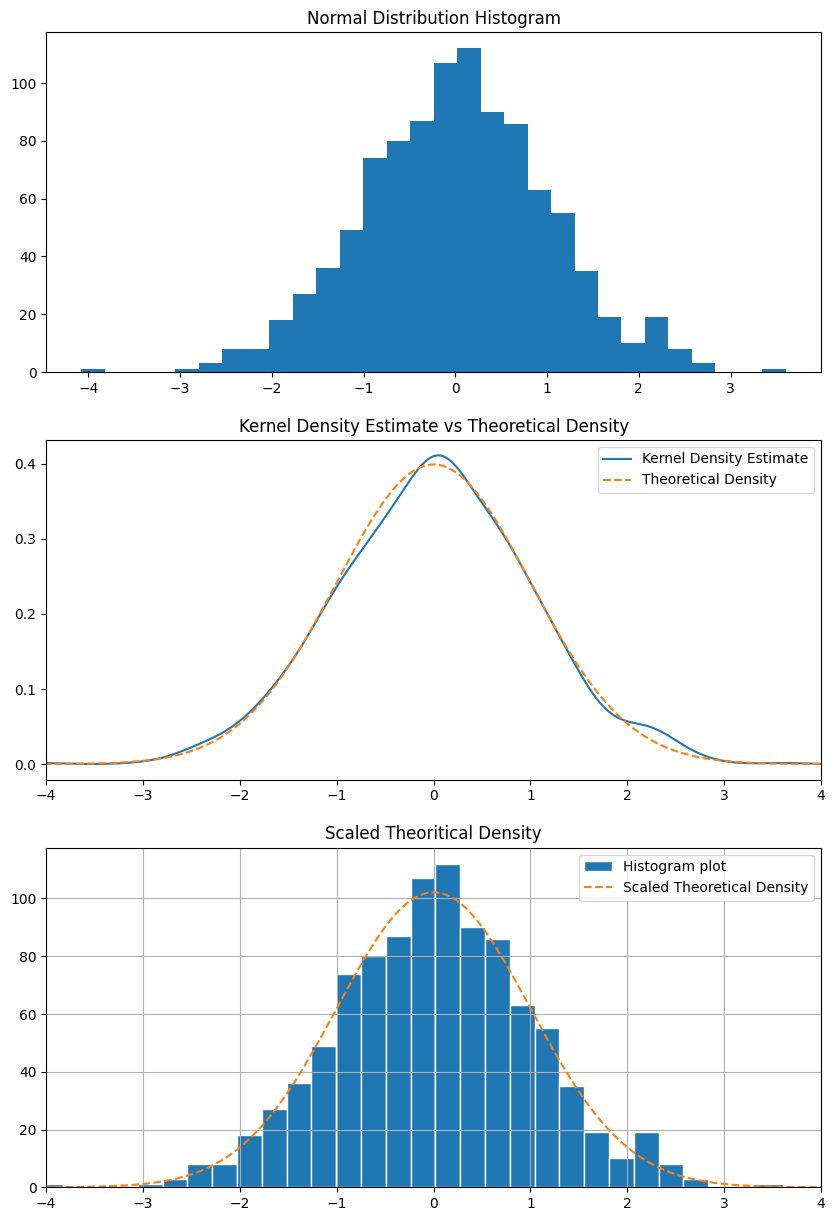

In [3]:
N = 1000
num_bins = 30
data_uniform, histogram_data_uniform, fig_uniform, ax_uniform = plot_data(N, num_bins,'uniform',min_x=-0.2, max_x=1.2, low=0, high=1)
data_normal, histogram_data_uniform, fig_normal, ax_normal = plot_data(N, num_bins, 'normal', 0.25, min_x=-4, max_x=4, mean=0, stddev=1)
plt.show()

In [4]:
def plot_mean_bin(data, histogram_data, method, min_x=-0.2,max_x=1.2, sd_lines=3, **kwargs):
    N = len(data)
    num_bins = len(histogram_data[0])
    if method.lower() == 'uniform':
        probablity_of_data_in_bin = 1 / num_bins
        bin_centers = (histogram_data[1][:-1] + histogram_data[1][1:]) / 2

        expected_count_in_each_bin = N * probablity_of_data_in_bin
        sd = np.sqrt(N * probablity_of_data_in_bin * (1 - probablity_of_data_in_bin))
        sd_vals = sd * np.ones(num_bins)
        expected_vals = expected_count_in_each_bin * np.ones(num_bins)        
        fig, ax = plt.subplots(1, figsize=(15, 5))
        ax.hist(data, bins=num_bins, density=False, label="Histogram plot", edgecolor='white')
        ax.plot(bin_centers, expected_vals, color='red', linestyle='dashed', label='Expected Count')
        ax.plot(bin_centers, expected_count_in_each_bin + sd_lines * sd_vals, color='black', linestyle='dashed', label='3sd line')
        ax.plot(bin_centers, expected_vals -sd_lines * sd_vals, color='black', linestyle='dashed', label='-3sd line')
        ax.set_title(f'Expected Count in Each Bin vs Histogram for {N} samples (Uniform Distribution)')
        ax.set_xlim(left=min_x,right=max_x)
        ax.legend()
        ax.grid(True)
        return ax
        

[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]
[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]
[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.

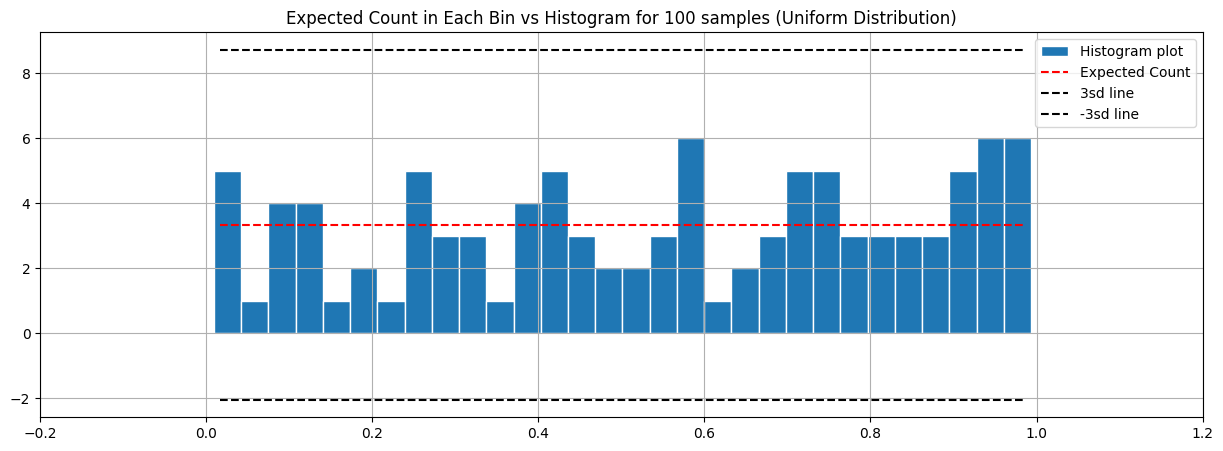

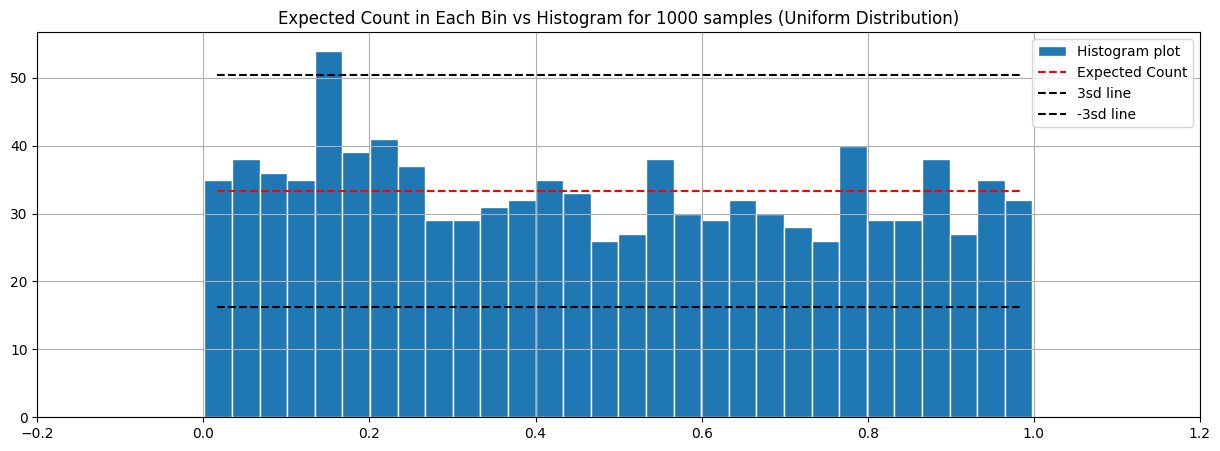

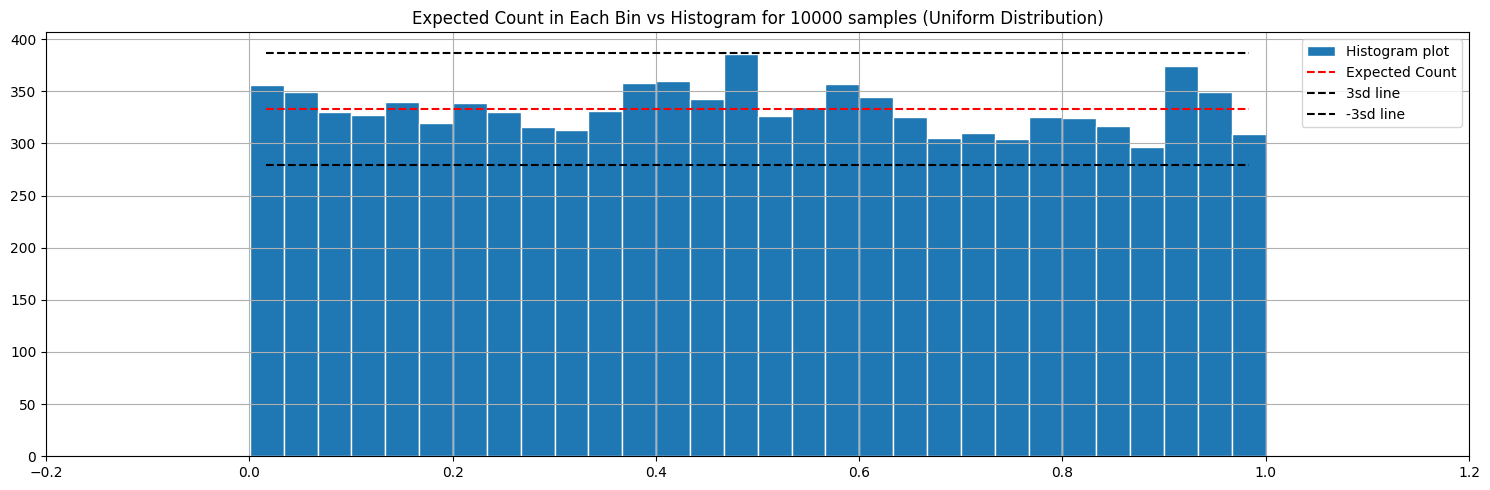

In [5]:
N_list = [100, 1000, 10000]
num_bins = 30
ax_list = []
for N in N_list:
    data_uniform, histogram_data_uniform = get_histogram_data(N, num_bins, 'uniform', low=0, high=1)
    ax = plot_mean_bin(data_uniform, histogram_data_uniform, 'uniform', min_x=-0.2, max_x=1.2, sd_lines=3)
    ax_list.append(ax)
plt.tight_layout()
plt.show()

Bin width: 0.7704573509270904


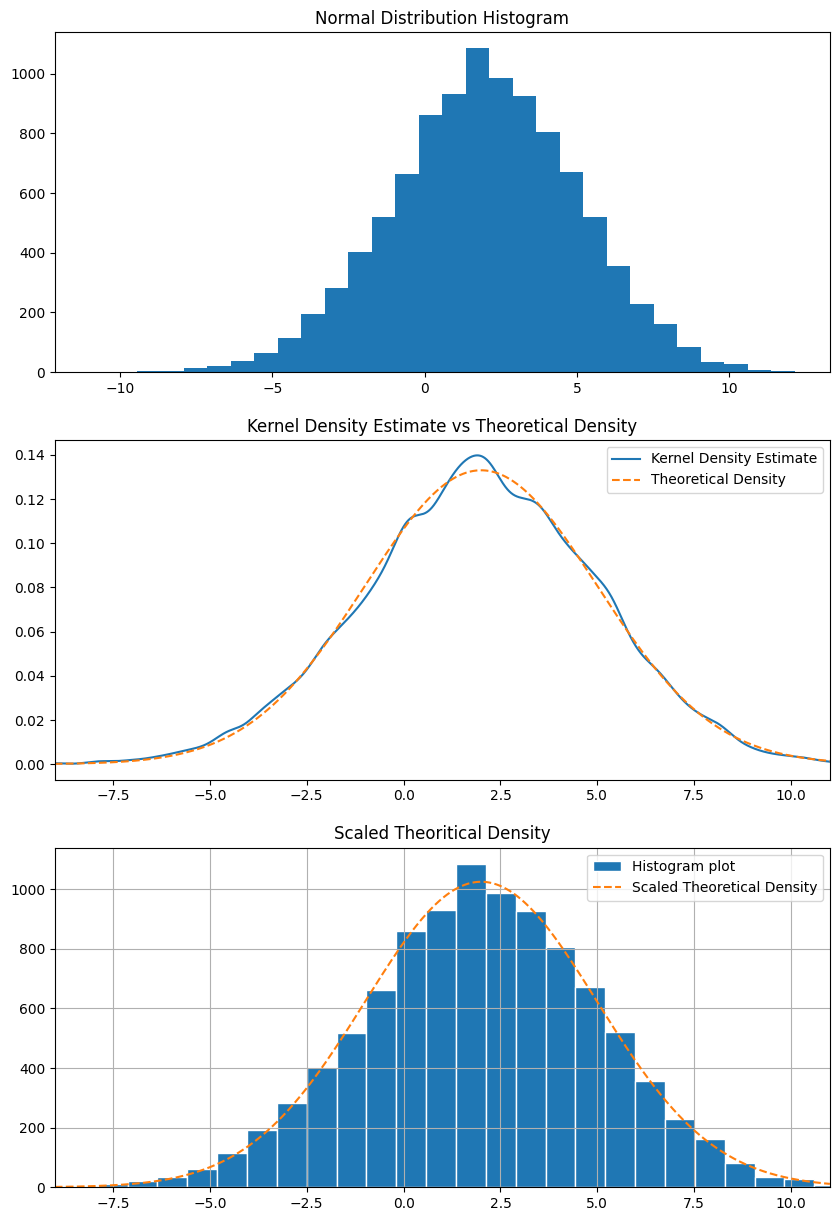

In [6]:
N = 10000
a = 3
b = 2
data, histogram_data = get_histogram_data(N, num_bins, 'normal', mean=0, stdd=1)
data = a * data + b
histogram_data = np.histogram(data, bins=num_bins)
print(f"Bin width: {(histogram_data[1][1] - histogram_data[1][0])}")
data, histogram_data, fig, ax = plot_data(N, num_bins, 'normal', kernel_width=0.3, min_x=-9, max_x=11, data_override=True, data=data, histogram_data=histogram_data, mean = b, stddev=a)

Bin Width: 0.03716305217972904
Bin Width after squaring: 0.07889759704073523


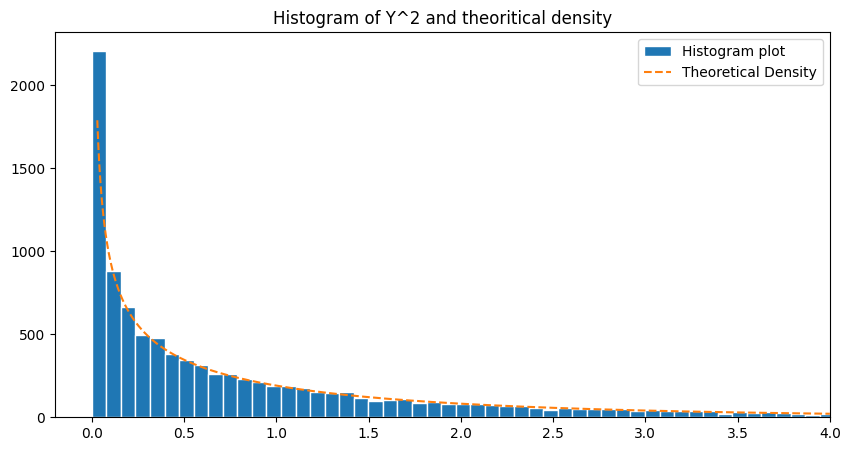

In [7]:
N = 10000
num_bins = 200
data, histogram_data = get_histogram_data(N, num_bins, 'normal', mean=0, stdd=1)
print(f'Bin Width: {(histogram_data[1][1] - histogram_data[1][0])}')
data = data * data
histogram_data = np.histogram(data, bins=num_bins)
bin_width = histogram_data[1][1] - histogram_data[1][0]
print(f'Bin Width after squaring: {bin_width}')
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.hist(data, bins=num_bins, label="Histogram plot", edgecolor='white')
ax.set_xlim(left=-0.2, right=4)
x_vals = np.linspace(min(data)+0.03, max(data)+1, int(N))
ax.plot(x_vals, N * bin_width * (1) * (1 / (np.sqrt(2 * x_vals* np.pi))) * np.exp(-0.5 * x_vals), label="Theoretical Density", linestyle='dashed')
ax.set_title('Histogram of Y^2 and theoritical density')
ax.legend()
plt.show()

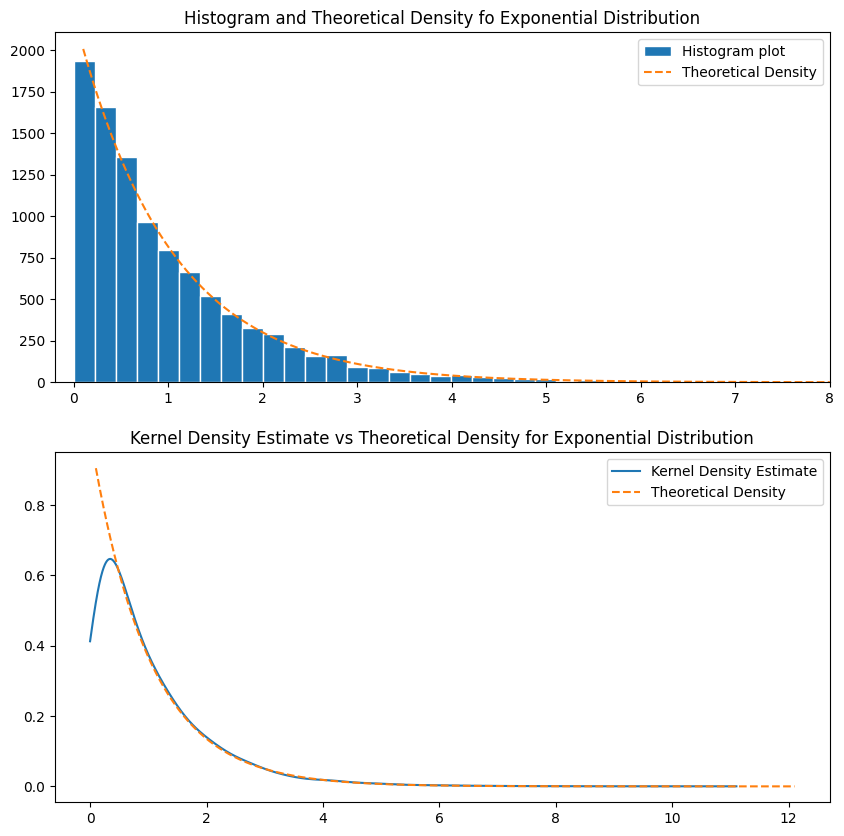

In [8]:
def inverse_exponent_cdf(y):
    return -np.log(1-y)
N = 10000
num_bins = 50
lower = 0
upper = 1
data = np.random.uniform(lower, upper, N)

data = -np.log(1-data)
histogram_data = np.histogram(data, bins=num_bins)
bin_width = histogram_data[1][1] - histogram_data[1][0]
scaling = N * bin_width
fig, ax = plt.subplots(2, figsize=(10, 10))
ax[0].hist(data, bins=num_bins, label="Histogram plot", edgecolor='white')
ax[0].set_xlim(left=-0.2, right=8)

x_vals = np.linspace(min(data)+0.1, max(data)+1, int(N))
ax[0].plot(x_vals, scaling * (np.exp(-x_vals)), label="Theoretical Density", linestyle='dashed')
ax[0].set_title('Histogram and Theoretical Density fo Exponential Distribution')
ax[0].legend()

sorted_data = np.sort(data)
density_estimate = ks.ksdensity(data=sorted_data, width=0.25)
ax[1].plot(sorted_data, density_estimate(sorted_data), label="Kernel Density Estimate")
ax[1].plot(x_vals, (np.exp(-x_vals)), label="Theoretical Density", linestyle='dashed')
ax[1].set_title('Kernel Density Estimate vs Theoretical Density for Exponential Distribution')
ax[1].legend()
plt.show()

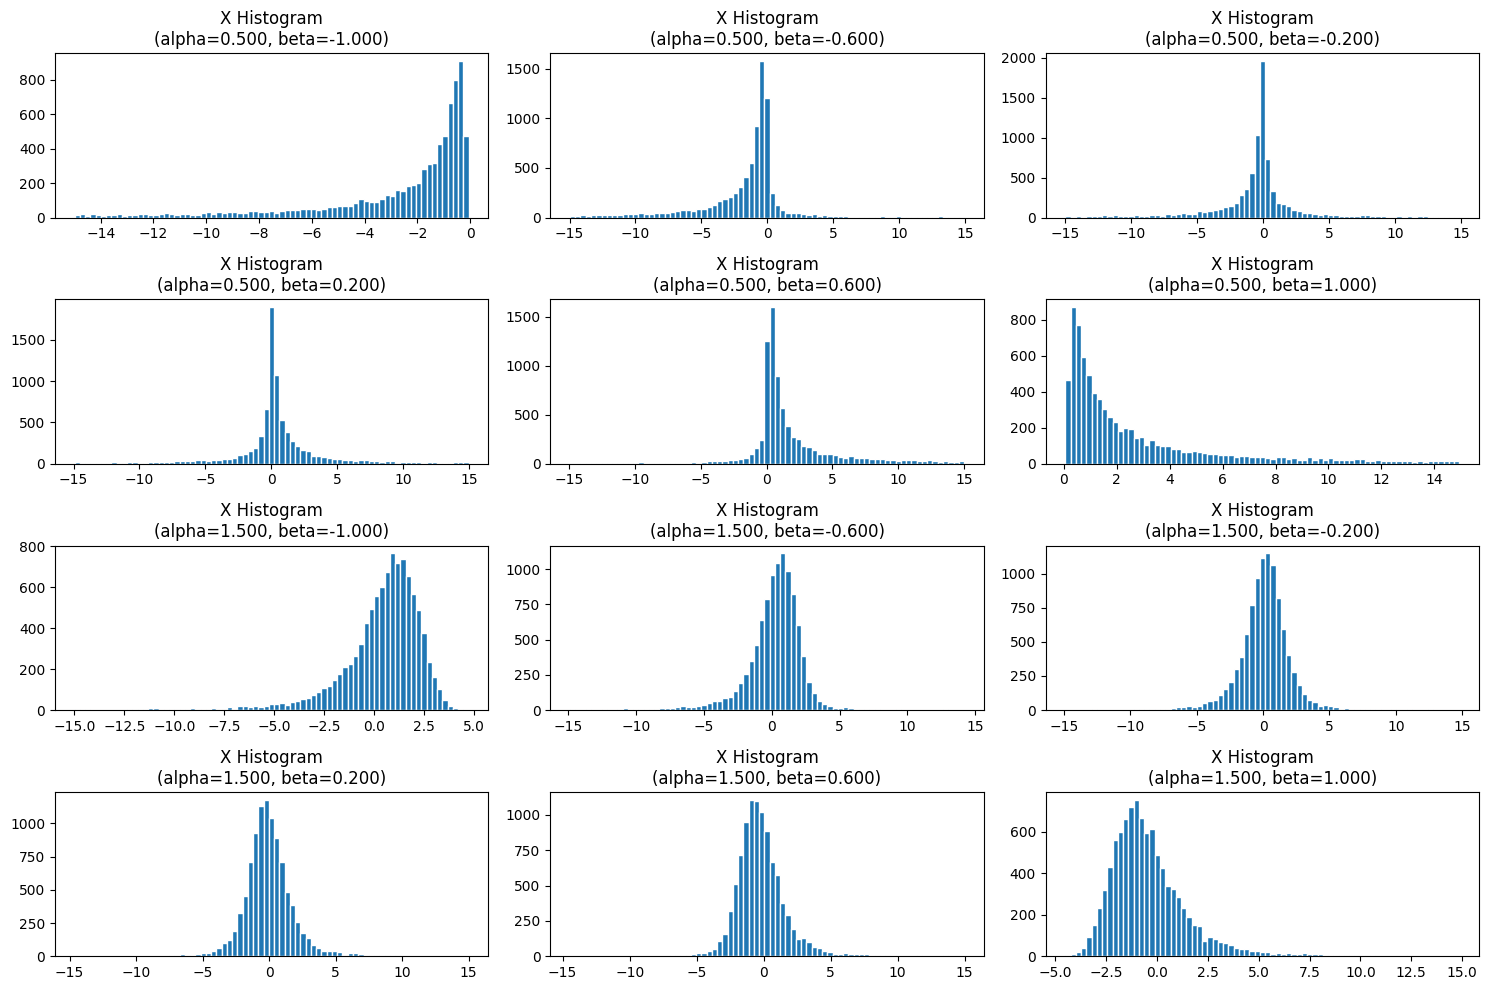

In [9]:
N = 10000 # Number of samples
alpha_vals = [0.5, 1.5] #  alpha values to use
num_beta_vals = 6 # number of beta values to plot
beta_vals = np.linspace(-1,1,num_beta_vals) # plot for 6 beta values

# Plot settings
number_per_row = 3
split = num_beta_vals // number_per_row
bins = 75
fig, ax_list = plt.subplots(split * len(alpha_vals),int(len(beta_vals)/split), figsize=(15, 10))
row_id = 0 # iterate over plot rows

for alpha in alpha_vals:
    col_id = 0 # iterate over cols
    for beta in beta_vals:
        ax = ax_list[row_id][col_id] # work on correct subplot
        col_id += 1

        # Generate X
        b = 1/alpha * np.arctan(beta * np.tan(np.pi * alpha / 2))
        s = (1 + beta**2 * np.tan(np.pi * alpha / 2)**2)**(1/(2*alpha))
        U = np.random.uniform(-np.pi/2, np.pi/2, N)
        W = np.random.exponential(1, N)
        X = s * (np.sin(alpha * (U + b)) / (np.cos(U))**(1/alpha)) * ( (np.cos(U - alpha * (U + b)) / W) ** ((1 - alpha)/alpha))
        

        # Filtering out unusual values of X with extremely low counts
        mask = X > -15
        X = X[mask]
        mask = X < 15
        X = X[mask]
        
        # Plot
        ax.hist(X, bins=bins, label="Histogram plot", edgecolor='white')
        hist_vals, bin_edges = np.histogram(X, bins=bins)
        ax.set_title(f'X Histogram\n(alpha={alpha:.3f}, beta={beta:.3f})')
        if col_id == len(beta_vals)/split:
            row_id += 1
            col_id = 0

plt.tight_layout()
plt.show()

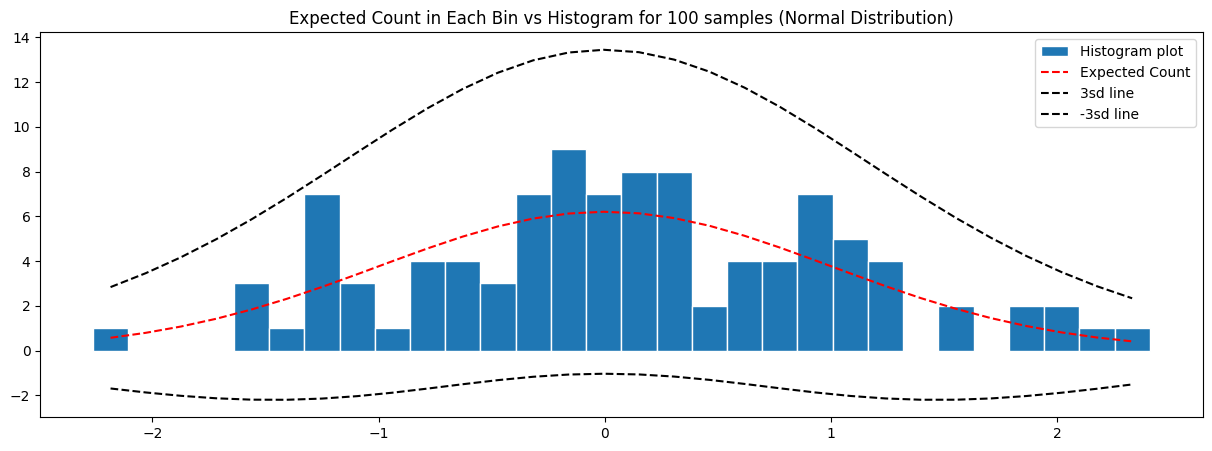

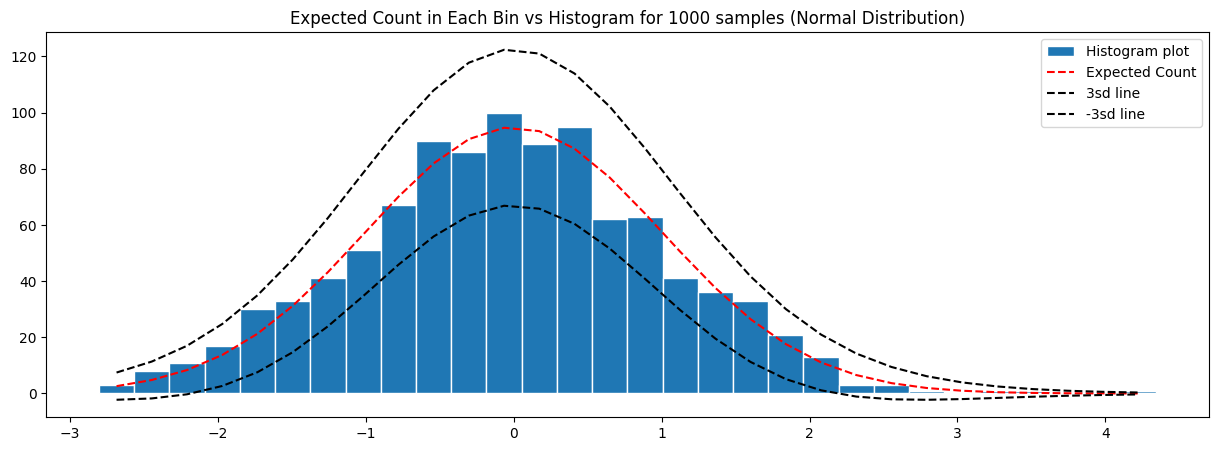

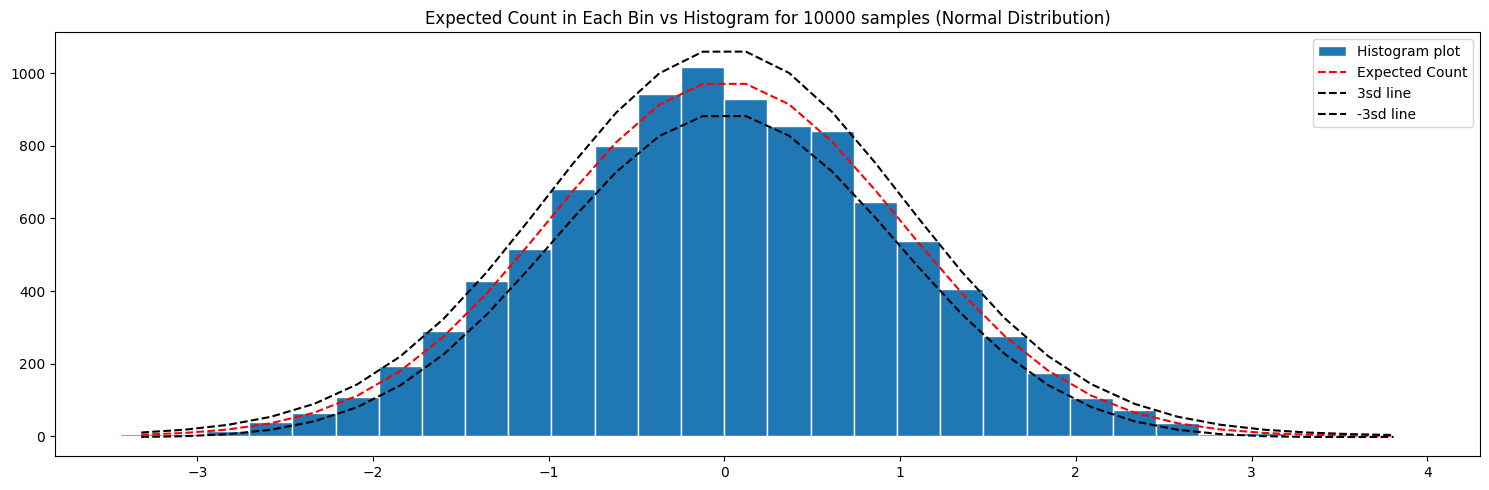

In [10]:
# Long report stuff
# Generate data for a gaussian and plot histogram with expected bin coutns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def plot_gaussian_histogram_with_expected_counts(N, num_bins):
    data = np.random.normal(0, 1, N)
    histogram_data = np.histogram(data, bins=num_bins)
    bin_centeres = (histogram_data[1][:-1] + histogram_data[1][1:]) / 2
    bin_width = histogram_data[1][1] - histogram_data[1][0]
    probablity_of_data_in_bin = norm.cdf(histogram_data[1][1:], loc=0, scale=1) - norm.cdf(histogram_data[1][:-1], loc=0, scale=1)
    expected_counts = N * probablity_of_data_in_bin
    sd_vals = np.sqrt(N * probablity_of_data_in_bin * (1 - probablity_of_data_in_bin))
    fig, ax = plt.subplots(1, figsize=(15, 5))
    ax.hist(data, bins=num_bins, density=False, label="Histogram plot", edgecolor='white')
    ax.plot(bin_centeres, expected_counts, color='red', linestyle='dashed', label='Expected Count')
    ax.plot(bin_centeres, expected_counts + 3 * sd_vals, color='black', linestyle='dashed', label='3sd line')
    ax.plot(bin_centeres, expected_counts - 3 * sd_vals, color='black', linestyle='dashed', label='-3sd line')
    ax.set_title(f'Expected Count in Each Bin vs Histogram for {N} samples (Normal Distribution)')
    ax.legend()
    return ax

N_list = [100, 1000, 10000]
ax_list = []
for N in N_list:
    ax = plot_gaussian_histogram_with_expected_counts(N, num_bins=30)
    ax_list.append(ax)
plt.tight_layout()
plt.show()

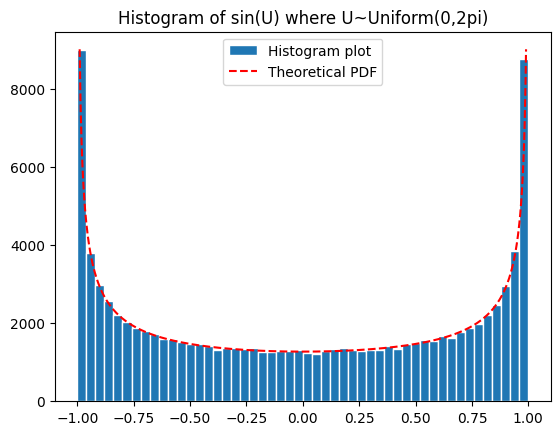

In [11]:
bins = 50
N = 100000
U = np.random.uniform(0, 2*np.pi, N)
X = np.sin(U)
X_histogram = np.histogram(X, bins=bins)
bin_width = X_histogram[1][1] - X_histogram[1][0]
fig,ax = plt.subplots(1)
ax.hist(X, bins=bins, label="Histogram plot", edgecolor='white')
theoritical_x = np.linspace(-0.99,0.99,1000)
theoritical_pdf = 1 / (np.pi * np.sqrt(1 - theoritical_x**2)) * N * bin_width
ax.plot(theoritical_x, theoritical_pdf, linestyle='dashed', color='red', label='Theoretical PDF')
ax.set_title('Histogram of sin(U) where U~Uniform(0,2pi)')
ax.legend()
plt.show()

[ 0.7         0.7        -0.79144205 ... -0.99616809 -0.63826261
 -0.9825687 ]
0.26953


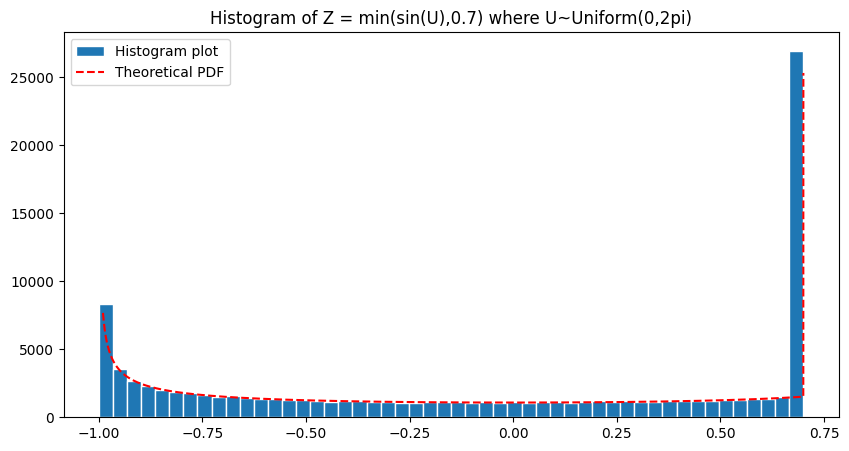

In [12]:
bins = 50
N = 100000
U = np.random.uniform(0, 2*np.pi, N)
Z = np.minimum(np.sin(U),0.7)
print(Z)
Z_histogram = np.histogram(Z, bins=bins)
print(Z_histogram[0][-1]/N)
bin_width = Z_histogram[1][1] - Z_histogram[1][0]
theoritical_x = np.linspace(-0.99,0.70,10000)
fig,ax = plt.subplots(1, figsize=(10, 5))
ax.hist(Z, bins=bins, label="Histogram plot", edgecolor='white')
theoritical_pdf = np.where(theoritical_x < 0.7, 1 / (np.pi * np.sqrt(1 - theoritical_x**2)) * N * bin_width,0.2531*N)
ax.plot(theoritical_x, theoritical_pdf, linestyle='dashed', color='red', label='Theoretical PDF')
ax.set_title('Histogram of Z = min(sin(U),0.7) where U~Uniform(0,2pi)')
ax.legend()
plt.show()
# Bin width large therefore the final X = 0.7 prediction is not accurate. However, on investigating as number of bins increases, the accuracy improves.
# Ran with 5k bins, and proportion of entries in final bin was near 0.253 which matches the theoretical value.

In [13]:
def inverse_exponent_cdf(y):
    return -np.log(1-y)
N = 10000
num_bins = 50
lower = 0
upper = 1
data = np.random.uniform(lower, upper, N)

data = -np.log(1-data)
histogram_data = np.histogram(data, bins=num_bins)
bin_width = histogram_data[1][1] - histogram_data[1][0]
scaling = N * bin_width

sample_mean = np.sum(data) / N
print(f'Sample Mean: {sample_mean}, Theoretical Mean: 1')
sample_variance = np.sum(data*data)/N - sample_mean**2
print(f'Sample Variance: {sample_variance}, Theoretical Variance: 1')

true_mean = 1
n_list = np.arange(100, 5001, 5)
iterations = 50
mean_estimate_error_squared_total=[]
variance_estimate_error_squared_total=[]
mean_estimate_error_squared_n=[]
for n in n_list:
    for i in range(iterations):
        data = np.random.uniform(lower, upper, n)
        data = -np.log(1-data)
        mean_estimate = np.sum(data[:n]) / n
        mean_estimate_error_squared_n.append((mean_estimate - true_mean)**2)
    
    mean_estimate_error_squared_total.append(np.sum(mean_estimate_error_squared_n)/iterations)
    variance_estimate_error_squared_total.append(np.var(mean_estimate_error_squared_n))
    mean_estimate_error_squared_n=[]



Sample Mean: 0.9893998081373182, Theoretical Mean: 1
Sample Variance: 0.9766809542283249, Theoretical Variance: 1


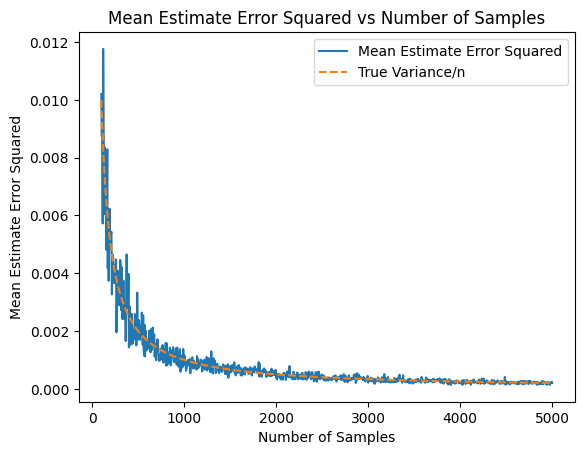

In [14]:

plt.title('Mean Estimate Error Squared vs Number of Samples')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Estimate Error Squared')
plt.plot(n_list, mean_estimate_error_squared_total, label='Mean Estimate Error Squared')
plt.plot(n_list, 1/n_list, linestyle='dashed',label='True Variance/n', alpha=1)
plt.legend()
plt.show()

In [15]:
# r^2  estimate
mean_estimate_error_squared_total = np.array(mean_estimate_error_squared_total)
estimate_variance = 1 / np.array(n_list)
sse = np.sum((mean_estimate_error_squared_total - estimate_variance)**2)
sse0 = np.sum((mean_estimate_error_squared_total - np.mean(mean_estimate_error_squared_total))**2)
r_squared = 1 - sse / sse0
print(f"R^2 value for Mean Estimate Error Squared vs 1/n: {r_squared}")

R^2 value for Mean Estimate Error Squared vs 1/n: 0.9439484329157922


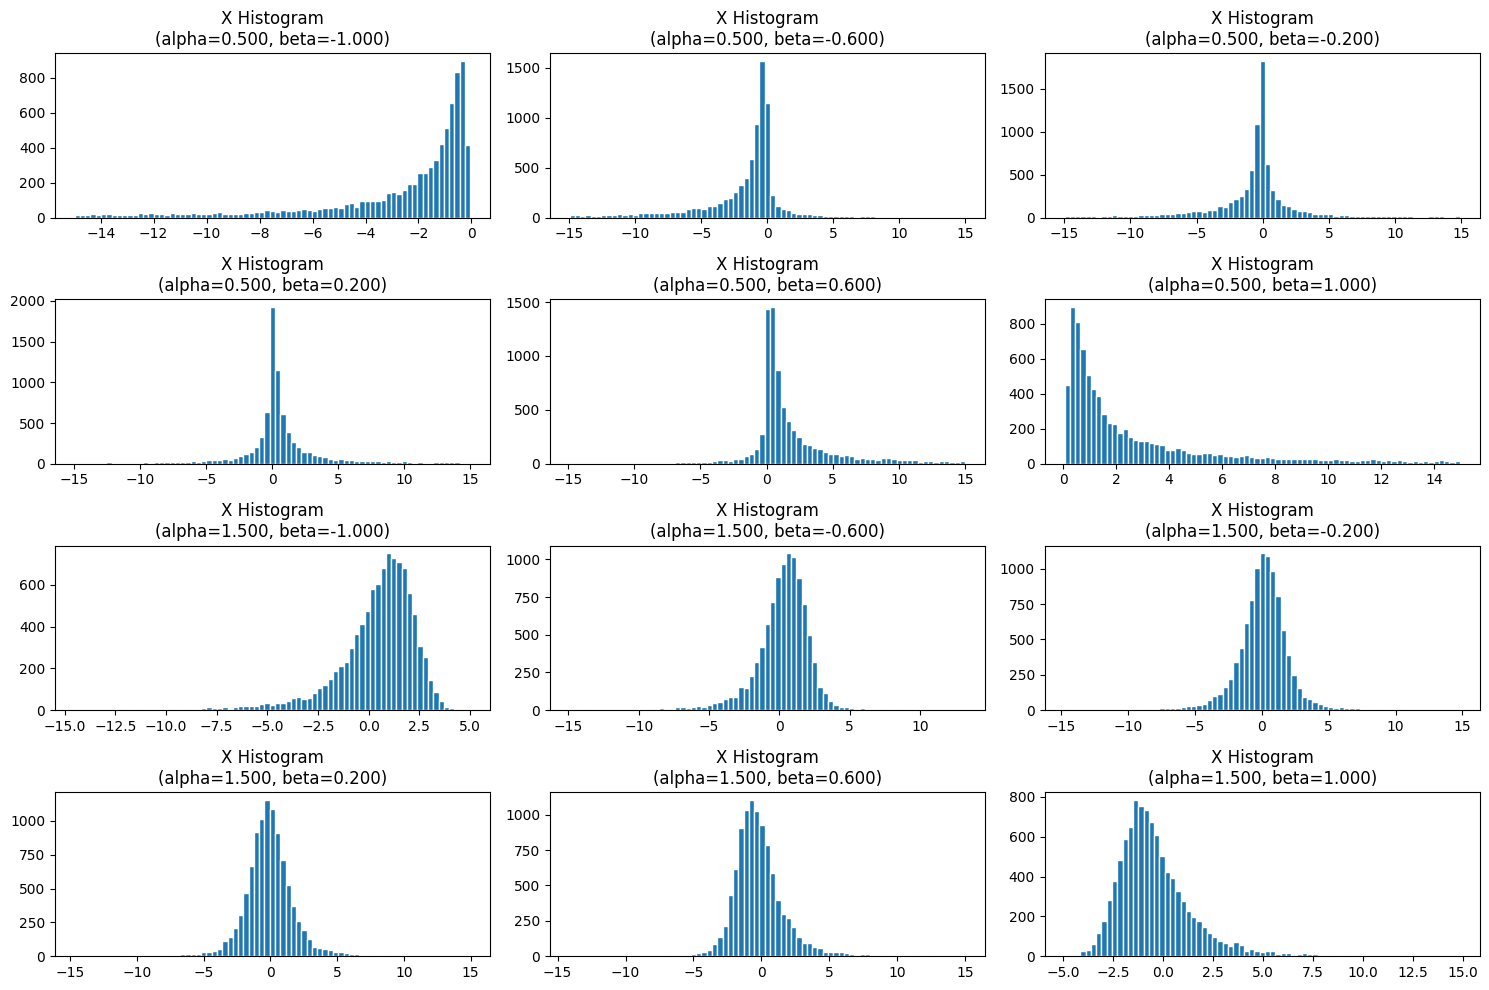

In [16]:
N = 10000 # Number of samples
alpha_vals = [0.5, 1.5] #  alpha values to use
num_beta_vals = 6 # number of beta values to plot
beta_vals = np.linspace(-1,1,num_beta_vals) # plot for 6 beta values

# Plot settings
number_per_row = 3
split = num_beta_vals // number_per_row
bins = 75
fig, ax_list = plt.subplots(split * len(alpha_vals),int(len(beta_vals)/split), figsize=(15, 10))
row_id = 0 # iterate over plot rows



for alpha in alpha_vals:
    col_id = 0 # iterate over cols
    for beta in beta_vals:
        ax = ax_list[row_id][col_id] # work on correct subplot
        col_id += 1

        # Generate X
        b = 1/alpha * np.arctan(beta * np.tan(np.pi * alpha / 2))
        s = (1 + beta**2 * np.tan(np.pi * alpha / 2)**2)**(1/(2*alpha))
        U = np.random.uniform(-np.pi/2, np.pi/2, N)
        W = np.random.exponential(1, N)
        X = s * (np.sin(alpha * (U + b)) / (np.cos(U))**(1/alpha)) * ( (np.cos(U - alpha * (U + b)) / W) ** ((1 - alpha)/alpha))
        

        # Filtering out unusual values of X with extremely low counts
        mask = X > -15
        X = X[mask]
        mask = X < 15
        X = X[mask]
        
        # Plot
        ax.hist(X, bins=bins, label="Histogram plot", edgecolor='white')
        hist_vals, bin_edges = np.histogram(X, bins=bins)
        ax.set_title(f'X Histogram\n(alpha={alpha:.3f}, beta={beta:.3f})')
        if col_id == len(beta_vals)/split:
            row_id += 1
            col_id = 0

plt.tight_layout()
plt.show()

In [17]:
import scipy.stats
def generate_stable_distribution(alpha, beta, N):
    b = 1/alpha * np.arctan(beta * np.tan(np.pi * alpha / 2))
    s = (1 + beta**2 * np.tan(np.pi * alpha / 2)**2)**(1/(2*alpha))
    U = np.random.uniform(-np.pi/2, np.pi/2, N)
    W = np.random.exponential(1, N)
    X = s * (np.sin(alpha * (U + b)) / (np.cos(U))**(1/alpha)) * ( (np.cos(U - alpha * (U + b)) / W) ** ((1 - alpha)/alpha))
    return X

alpha_vals = [0.5, 1.5]
N = 10000
tails = [0, 3, 6]
beta = 0
for alpha in alpha_vals:
    X = generate_stable_distribution(alpha, beta, N)
    for tail in tails:
        X_tail = X[np.abs(X) > tail]
        tail_count = len(X_tail)
        tail_prob = tail_count / N
        print(f'Alpha: {alpha}, Tail Threshold: {tail}, Tail Probability: {tail_prob:.5f}')




Alpha: 0.5, Tail Threshold: 0, Tail Probability: 1.00000
Alpha: 0.5, Tail Threshold: 3, Tail Probability: 0.37130
Alpha: 0.5, Tail Threshold: 6, Tail Probability: 0.27850
Alpha: 1.5, Tail Threshold: 0, Tail Probability: 1.00000
Alpha: 1.5, Tail Threshold: 3, Tail Probability: 0.10390
Alpha: 1.5, Tail Threshold: 6, Tail Probability: 0.02910


C:\Users\meghn\AppData\Local\Temp\ipykernel_12264\3536338960.py:56: RuntimeWarning: divide by zero encountered in log
  log_tail_probs = np.log(one_sided_tail_cdf[t_vals>asymptotic_threshold]) # avoid first condition
c:\Users\meghn\Desktop\Cambridge\Projects\3F3\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2908: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
c:\Users\meghn\Desktop\Cambridge\Projects\3F3\.venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2913: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


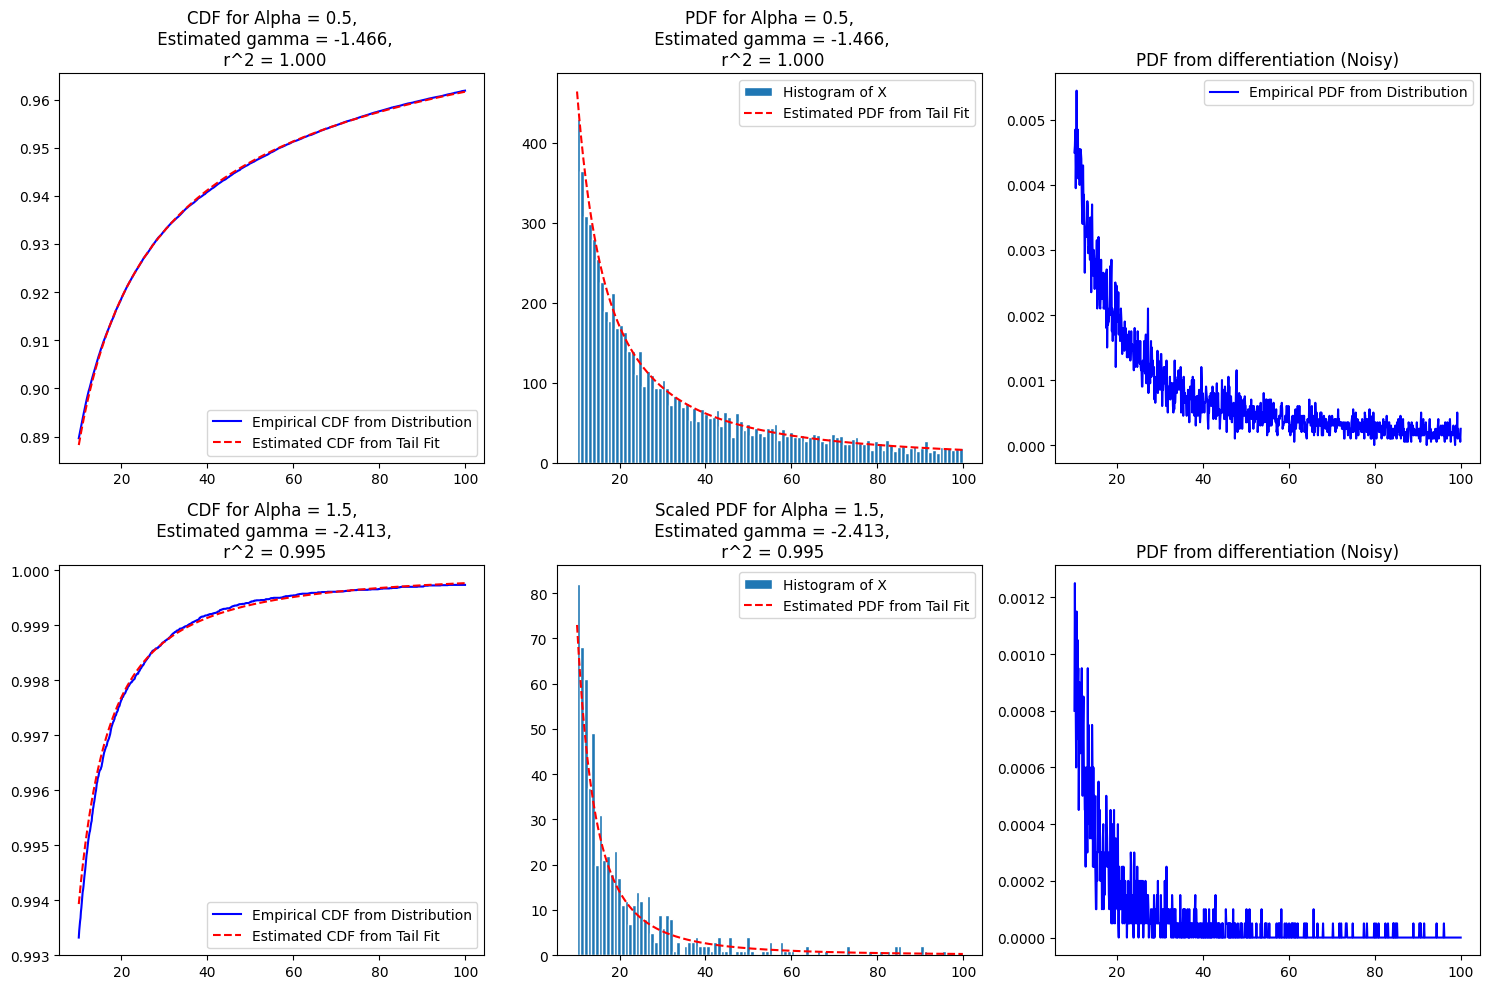

In [18]:
alpha_vals = np.linspace(0.05, 2, 100)
mask = alpha_vals != 1
alpha_vals = alpha_vals[mask]
if 0.5 not in alpha_vals:
    alpha_vals = np.append(alpha_vals, 0.5)
if 1.5 not in alpha_vals:
    alpha_vals = np.append(alpha_vals, 1.5)
alpha_vals = np.sort(alpha_vals)
t_vals = np.arange(0, 100, 0.1)
fig, ax = plt.subplots(2,3, figsize=(15, 10))
asymptotic_threshold = 10
N = 100000
gamma_estimates = []
r_2_estimates = []
c_estimates = []

for alpha in alpha_vals:
    asymptotic_threshold = 10
    X = generate_stable_distribution(alpha, 0, N)
    
    prev_tail_cdf = None
    pdf_vals = []
    x_vals = []
    cdf_vals = []
    one_sided_tail_cdf = []
    for i,tail in enumerate(t_vals):
        X_tail = X[np.abs(X) > tail]
        tail_count = len(X_tail)
        tail_prob_absolute = tail_count / N # estimate of P(|X| > t)
        # Assuming symmetry, get P(X > t)
        one_sided_tail_probability = tail_prob_absolute / 2
        one_sided_tail_cdf.append(one_sided_tail_probability)
        
        # Convert to CDF form
        cdf_value = 1 - one_sided_tail_probability
        cdf_vals.append(cdf_value)
        if prev_tail_cdf:
            pdf_estimate = (cdf_value - prev_tail_cdf) / (tail - t_vals[i-1])
            pdf_vals.append(pdf_estimate)
            x_vals.append(tail) # use a forward difference
        prev_tail_cdf = cdf_value
    # Guess pdf shape: p(x) = c * x^gamma for large x 
    # on integrating, P(X>x) = -c/(gamma+1) * x^(gamma+1) for large x

    # converting to numpy arrays
    x_vals = np.array(x_vals) # These are the x_values for plotting the pdf and cdf
    pdf_vals = np.array(pdf_vals) # There are the pdf vvalues calculated by differetiation 
    cdf_vals = np.array(cdf_vals) # These are the cdf values calculated from tail probabilities
    one_sided_tail_cdf = np.array(one_sided_tail_cdf) # These are the one sided tail probabilities (P(X>t)) and used for getting estimate for gamma

    # estimnate gamma from linear regression on log scale
    # ln(P(X>t)) = ln(-c/(gamma+1)) + (gamma+1) * ln(t) 
    # take t_values that are asymtpotic in range
    t_vals_asymptotic = t_vals[t_vals > 10]
    log_t = np.log(t_vals_asymptotic) # avoid log(0)
    log_tail_probs = np.log(one_sided_tail_cdf[t_vals>asymptotic_threshold]) # avoid first condition

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(log_t, log_tail_probs)
    gamma_estimate = slope - 1
    c_estimate = - (gamma_estimate + 1) * np.exp(intercept)

    gamma_estimates.append(gamma_estimate)
    r_2_estimates.append(r_value**2)
    c_estimates.append(c_estimate)
    # Plot values for alpha = 0.5 and alpha = 1.5

    #workign with histogram data
    bins = 100
    filtered_x = X[X<np.max(t_vals)]
    filtered_x = filtered_x[filtered_x>asymptotic_threshold]
    _, bin_edges = np.histogram(filtered_x, bins=bins)
    scaling = N * (bin_edges[1] - bin_edges[0])
    if alpha == 0.5:
        #print(filtered_x)
        cdf_estimate = 1 + c_estimate/slope * t_vals_asymptotic**(slope)
        cdf_from_distribution = cdf_vals[t_vals > 10]
        
        ax[0][0].plot(t_vals_asymptotic, cdf_from_distribution, label='Empirical CDF from Distribution', color='blue')
        ax[0][0].plot(t_vals_asymptotic, cdf_estimate, linestyle='dashed', label='Estimated CDF from Tail Fit', color='red')
        ax[0][0].set_title(f'CDF for Alpha = 0.5,\n Estimated gamma = {gamma_estimate:.3f},\n r^2 = {r_value**2:.3f}')

        pdf_estimate = c_estimate * x_vals[x_vals>asymptotic_threshold]**(slope - 1)
        pdf_from_distribution = pdf_vals[x_vals>asymptotic_threshold]
        
        ax[0][1].hist(filtered_x, bins=bins, label='Histogram of X', edgecolor='white')
        ax[0][1].plot(t_vals_asymptotic, scaling * pdf_estimate, linestyle='dashed', label='Estimated PDF from Tail Fit', color='red')
        ax[0][1].set_title(f'PDF for Alpha = 0.5,\n Estimated gamma = {gamma_estimate:.3f},\n r^2 = {r_value**2:.3f}')
        
        ax[0][2].plot(t_vals_asymptotic, pdf_from_distribution, label='Empirical PDF from Distribution', color='blue')
        ax[0][2].set_title(f'PDF from differentiation (Noisy)')

        ax[0][0].legend()
        ax[0][1].legend()
        ax[0][2].legend()
    
    elif alpha == 1.5:
        cdf_estimate = 1 + c_estimate/slope * t_vals_asymptotic**(slope)
        cdf_from_distribution = cdf_vals[t_vals > asymptotic_threshold]
        ax[1][0].plot(t_vals_asymptotic, cdf_from_distribution, label='Empirical CDF from Distribution', color='blue')
        ax[1][0].plot(t_vals_asymptotic, cdf_estimate, linestyle='dashed', label='Estimated CDF from Tail Fit', color='red')
        ax[1][0].set_title(f'CDF for Alpha = 1.5,\n Estimated gamma = {gamma_estimate:.3f},\n r^2 = {r_value**2:.3f}')

        pdf_estimate = c_estimate * x_vals[x_vals>asymptotic_threshold]**(slope - 1)
        pdf_from_distribution = pdf_vals[x_vals>asymptotic_threshold]
        
        ax[1][1].hist(filtered_x, bins=bins, label='Histogram of X', edgecolor='white')
        ax[1][1].plot(t_vals_asymptotic,scaling * pdf_estimate, linestyle='dashed', label='Estimated PDF from Tail Fit', color='red')
        ax[1][1].set_title(f'Scaled PDF for Alpha = 1.5,\n Estimated gamma = {gamma_estimate:.3f},\n r^2 = {r_value**2:.3f}')
        
        ax[1][2].plot(t_vals_asymptotic, pdf_from_distribution, label='Empirical PDF from Distribution', color='blue')
        ax[1][2].set_title(f'PDF from differentiation (Noisy)')
        
        ax[1][0].legend()
        ax[1][1].legend()
        ax[0][2].legend()

plt.tight_layout()
plt.show()


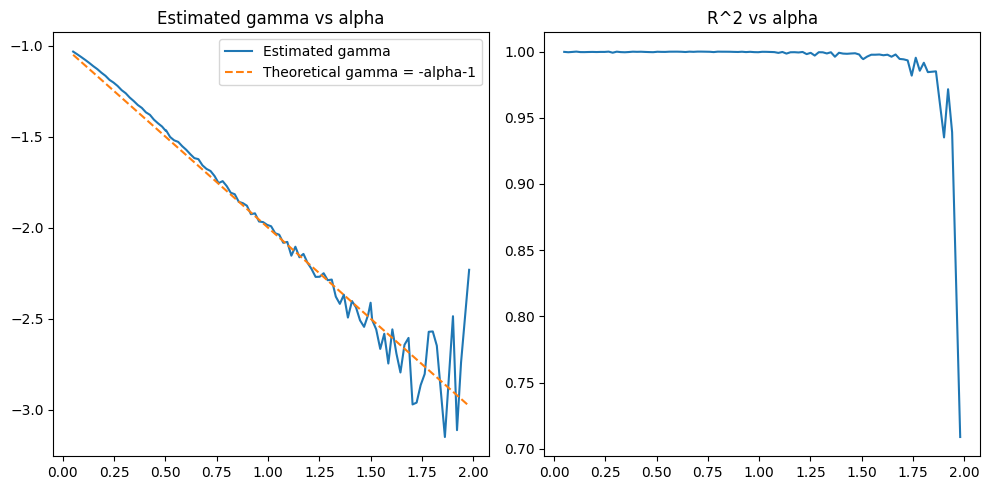

In [19]:
gamma_estimates = np.array(gamma_estimates)
c_estimates = np.array(c_estimates)
r_2_estimates = np.array(r_2_estimates)

fig, ax = plt.subplots(1,2, figsize=(10, 5))
gamma_mask = np.isnan(gamma_estimates) == False

alpha_vals = alpha_vals[gamma_mask]
c_estimates = c_estimates[gamma_mask]
gamma_estimates = gamma_estimates[gamma_mask]
r_2_estimates = r_2_estimates[gamma_mask]

ax[0].plot(alpha_vals, gamma_estimates, label='Estimated gamma')
ax[0].plot(alpha_vals, -alpha_vals-1, linestyle='dashed', label='Theoretical gamma = -alpha-1')
#ax[1].plot(alpha_vals, c_estimates)
ax[1].plot(alpha_vals, r_2_estimates)
ax[0].set_title('Estimated gamma vs alpha')
ax[0].legend()
ax[1].set_title('R^2 vs alpha')
#ax[2].set_title('R^2 vs alpha')

plt.tight_layout()
plt.show()

In [ ]:
sstot = np.sum((gamma_estimates - np.mean(gamma_estimates))**2)
ssres = np.sum((gamma_estimates - (-alpha_vals - 1))**2)
r_squared = 1 - (ssres / sstot)
print(f'Overall R^2 for gamma estimates: {r_squared:.5f}')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(alpha_vals, gamma_estimates)
print(f'Linear Regression Fit: slope = {slope:.5f}, intercept = {intercept:.5f}, R^2 = {r_value**2:.5f}')



Overall R^2 for gamma estimates: 0.95723


R^2 for filtered gamma estimates (r^2 > 0.99): 0.98622
Max r^2 for estimate: 0.98915, with slope: -1.05660 and intercept: -0.94348


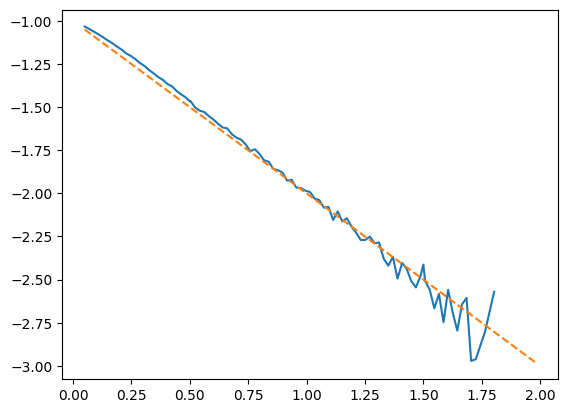

In [21]:
alpha_vals_filtered_r_2 = alpha_vals[r_2_estimates > 0.99]
gamma_estimates_filtered_r_2 = gamma_estimates[r_2_estimates > 0.99]
plt.plot(alpha_vals_filtered_r_2, gamma_estimates_filtered_r_2, label='Estimated gamma (r^2 > 0.99)')
plt.plot(alpha_vals, -alpha_vals-1, linestyle='dashed', label='Theoretical gamma = -alpha-1')
r_2 = 1 - np.sum((gamma_estimates_filtered_r_2 - (-alpha_vals_filtered_r_2 - 1))**2) / np.sum((gamma_estimates_filtered_r_2 - np.mean(gamma_estimates_filtered_r_2))**2)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(alpha_vals_filtered_r_2, gamma_estimates_filtered_r_2)
print(f'R^2 for filtered gamma estimates (r^2 > 0.99): {r_2:.5f}')
print(f'Max r^2 for estimate: {r_value**2:.5f}, with slope: {slope:.5f} and intercept: {intercept:.5f}')


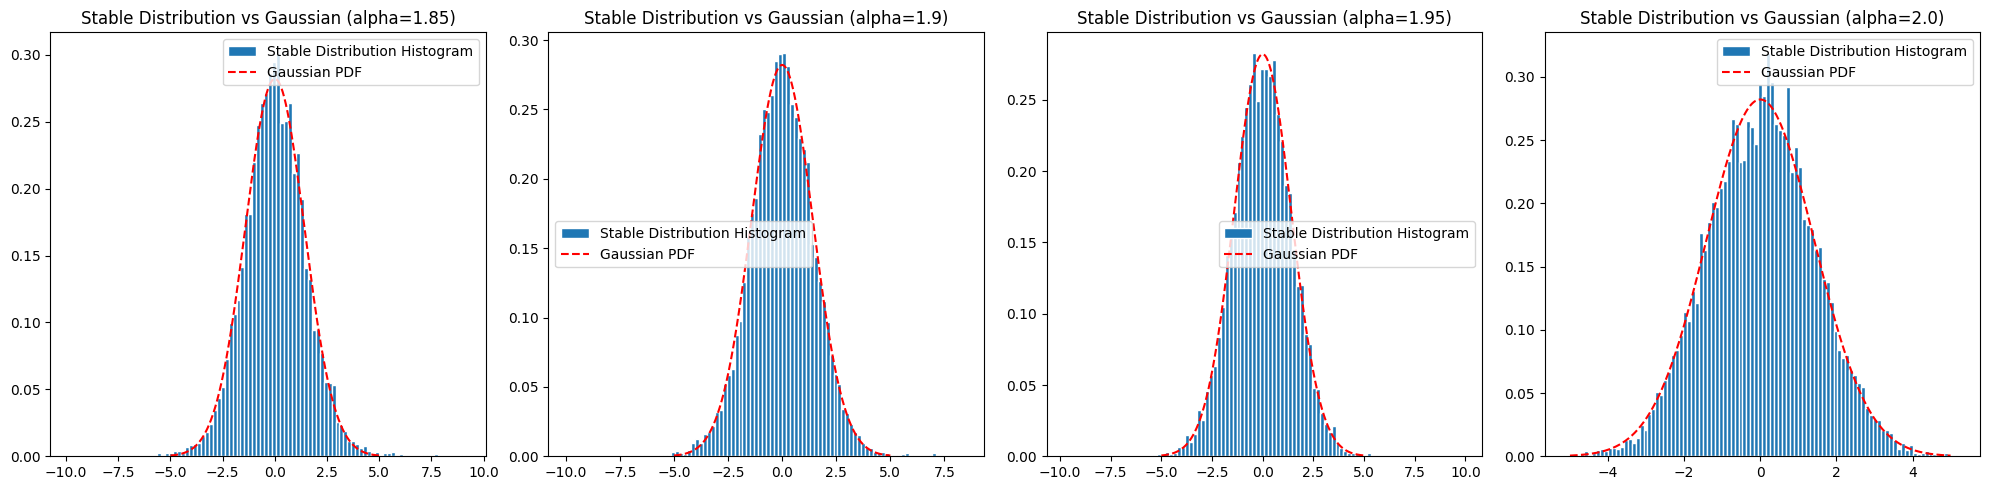

In [23]:
alpha_vals = np.array([1.85, 1.9, 1.95, 2])
N = 10000 # Number of samples
# plot the stable distributions for alpha values close to 2 with an overlayed gaussian distribution
fig, ax = plt.subplots(1,4, figsize=(20, 5))
for i, alpha in enumerate(alpha_vals):
    X = generate_stable_distribution(alpha, 0, N)
    X = X[np.abs(X) < 10] # filter extreme values for better plotting
    ax[i].hist(X, bins=100, density=True, label='Stable Distribution Histogram', edgecolor='white')
    x_vals = np.linspace(-5, 5, 1000)
    gaussian_pdf = (1 / np.sqrt(2 * np.pi*2)) * np.exp(-0.25 * x_vals**2)
    ax[i].plot(x_vals, gaussian_pdf, linestyle='dashed', color='red', label='Gaussian PDF')
    ax[i].set_title(f'Stable Distribution vs Gaussian (alpha={alpha})')
    ax[i].legend()
plt.tight_layout()
plt.show()